In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
iris=datasets.load_iris()

In [67]:
d=dict(zip(np.unique(iris.target),iris.target_names))
d

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [88]:
label=[d[i] for i in iris.target]

In [47]:
df=pd.DataFrame(iris.data)

In [48]:
df['label']=pd.Series(label)

In [69]:
df.columns=list(iris.feature_names)+['label']

In [70]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [71]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
label                150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


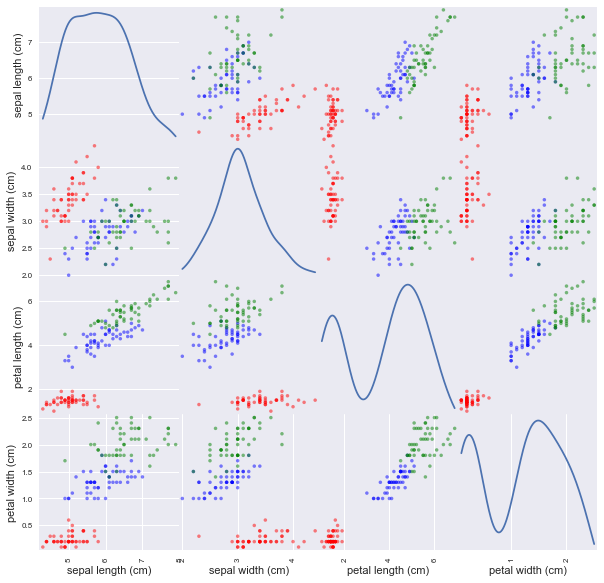

In [90]:
p=dict(zip(iris.target_names,['red','blue','green']))
colors=[p[i] for i in df['label']]
pd.plotting.scatter_matrix(df.iloc[:,:5],color=colors,figsize=(10,10),diagonal='kde')  #diagonal='hist'
plt.show()

# label encode

In [95]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df['label'].unique())
df['target']=le.transform(df['label'])

# KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [106]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:4],df['target'],test_size=0.1)

In [128]:
model1=KNeighborsClassifier(n_neighbors=5,metric='manhattan')
model1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [129]:
model1.score(x_train,y_train)

0.97037037037037033

In [130]:
pred=model1.predict(x_test)

In [114]:
from sklearn import metrics

In [131]:
metrics.accuracy_score(y_test,pred)

0.93333333333333335

In [132]:
metrics.confusion_matrix(y_test,pred,labels=[0,1,2])

array([[4, 0, 0],
       [0, 4, 0],
       [0, 1, 6]])

In [125]:
pd.crosstab(y_test,pred,colnames=['pred'])

pred,0,1,2
target,,,
0,4,0,0
1,0,4,0
2,0,0,7


In [145]:
model1.predict_proba(x_test)

array([[ 0. ,  0. ,  1. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0.6,  0.4],
       [ 1. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0.4,  0.6],
       [ 0. ,  1. ,  0. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ]])

In [135]:
pd.DataFrame(x)

,0,1,2
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
5,0.0,0.6,0.4
6,1.0,0.0,0.0
7,1.0,0.0,0.0
8,0.0,1.0,0.0
9,0.0,0.0,1.0


In [143]:
x=model1.predict_proba(x_test)
y=np.array(y_test).reshape(15,1)

In [144]:
np.hstack((x,y))

array([[ 0. ,  0. ,  1. ,  2. ],
       [ 0. ,  1. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ,  2. ],
       [ 1. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ,  1. ],
       [ 0. ,  0.6,  0.4,  2. ],
       [ 1. ,  0. ,  0. ,  0. ],
       [ 1. ,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ,  2. ],
       [ 0. ,  0.4,  0.6,  2. ],
       [ 0. ,  1. ,  0. ,  1. ],
       [ 1. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  2. ],
       [ 0. ,  0. ,  1. ,  2. ]])

In [148]:
np.repeat(1,6).reshape(3,2)

array([[1, 1],
       [1, 1],
       [1, 1]])

# Multinomial logistics